In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import heapq 
import numpy as np
# use this comand to install community
# pip3 install python-louvain
import community
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [2]:
business = pd.read_csv('datasets/yelp_business.csv')
reviews = pd.read_csv('datasets/yelp_review_modified.csv')

In [3]:
counts = business['city'].value_counts()
print(counts[counts < 600])

Huntersville             566
Fort Mill                559
Lakewood                 487
Gastonia                 438
Cornelius                428
                        ... 
Middleburg Hts.            1
Midddleton                 1
Scarobrough                1
Harrisbug                  1
Saint-Basile-Le-Grand      1
Name: city, Length: 1059, dtype: int64


In [4]:
business.loc[business.city == 'Huntersville']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
361,78Gz9WWdiEJMBfQ1MFWUSg,"""360 Visuals""",NaN,"""10230 Hickorywood Hill Ave, Ste B""",Huntersville,NC,28078,35.411312,-80.860086,5.0,4,1,Photographers;Event Planning & Services;Sessio...
599,I7HBBsdpx5hNS4o79S9zSQ,"""Terminix""",NaN,"""105 Center Ln""",Huntersville,NC,28078,35.398208,-80.853610,2.5,3,1,Local Services;Pest Control
673,mhpeV-UzQL2LT5pQnyjquQ,"""Birkdale Golf Club""",NaN,"""16500 Birkdale Cmns Pkwy""",Huntersville,NC,28078,35.440946,-80.882262,3.0,12,1,Active Life;Golf
855,WtqzJcXEt5lc0hSeJ-bAJg,"""Bob Evans""",NaN,"""16706 Northcross Dr""",Huntersville,NC,28078,35.442220,-80.873559,3.0,24,1,Bed & Breakfast;Breakfast & Brunch;Salad;Ameri...
928,qesPXWJdHlRnB4Zz8iBNeQ,"""Novant Health Huntersville Medical Center""",NaN,"""10030 Gilead Rd""",Huntersville,NC,28078,35.406334,-80.859891,2.0,21,1,Hospitals;Health & Medical
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173727,rhO7J9xmoS_jtZXqD-Uiaw,"""Averette Comfort Services, Inc.""",NaN,"""8815 Lizzie Ln""",Huntersville,NC,28078,35.424502,-80.886074,4.5,5,1,Home Services;Heating & Air Conditioning/HVAC
173850,PLjPZNhEt5BRxczHGd5v7g,"""The Goddard School""",NaN,"""9534 Kincey Ave""",Huntersville,NC,28078,35.402497,-80.868493,1.5,3,1,Specialty Schools;Education;Preschools;Child C...
173903,ST_MJ4xq1GYSoc3LfgMFnQ,"""Kilwins""",NaN,"""16926 Birkdale Commons Pkwy, Ste A""",Huntersville,NC,28078,35.445924,-80.878584,4.5,54,1,Ice Cream & Frozen Yogurt;Specialty Food;Food;...
173904,9tqA5e4YctbjiU6e12otHw,"""Pine Cleaners""",NaN,"""14229 Reese Blvd, Unit B1""",Huntersville,NC,28078,35.407613,-80.862929,3.5,6,1,Dry Cleaning & Laundry;Laundry Services;Local ...


In [5]:
business_locals = business[['latitude', 'longitude']]

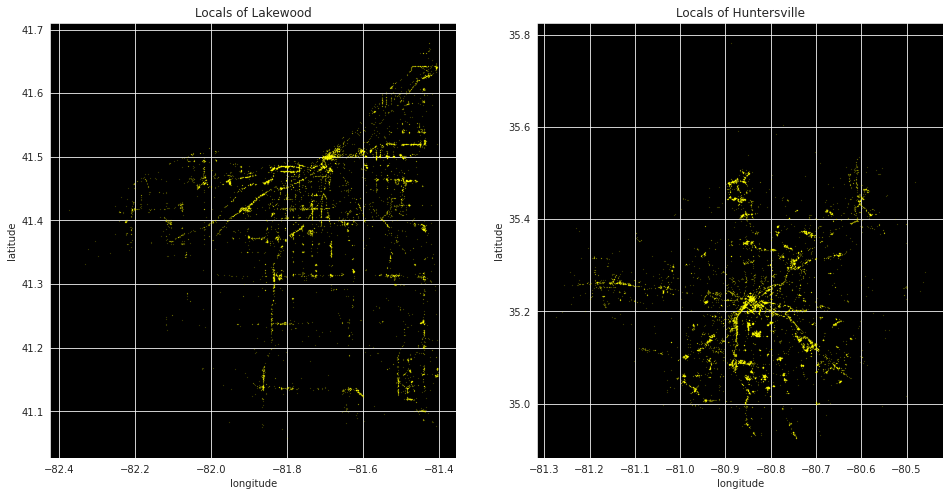

In [6]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))

# lat y long de Lakewood
lat_lw = 41.4743
lon_lw = -81.9023

# Obtener valores de lat y lon alrededor de lakewood
lat_lw_min, lat_lw_max = lat_lw-0.5,lat_lw+0.5
lon_lw_min, lon_lw_max = lon_lw-0.5,lon_lw+0.5

business_locals_lw = business_locals[
                    (business_locals["latitude"]>lat_lw_min) &\
                    (business_locals["latitude"]<lat_lw_max) &\
                    (business_locals["longitude"]>lon_lw_min) &\
                    (business_locals["longitude"]<lon_lw_max)]

business_locals_lw.plot(kind='scatter', x='longitude', y='latitude',
                    color='yellow', s=.02, alpha=.6, subplots=True, ax=ax1)

ax1.set_title("Locals of Lakewood")
ax1.set_facecolor('black')

# lat y long de Huntersville
lat_hv = 35.4253
lon_hv = -80.8634

# Obtener valores de lat y lon alrededor de huntersville
lat_hv_min, lat_hv_max = lat_hv-0.5,lat_hv+0.5
lon_hv_min, lon_hv_max = lon_hv-0.5,lon_hv+0.5

business_locals_hv = business_locals[
                    (business_locals["latitude"]>lat_hv_min) &\
                    (business_locals["latitude"]<lat_hv_max) &\
                    (business_locals["longitude"]>lon_hv_min) &\
                    (business_locals["longitude"]<lon_hv_max)]

business_locals_hv.plot(kind='scatter', x='longitude', y='latitude',
                    color='yellow', s=.02, alpha=.6, subplots=True, ax=ax2)

ax2.set_title("Locals of Huntersville")
ax2.set_facecolor('black')

In [7]:
def generate_user_network(city, stars, common_cant):
    #genera diccionario de usuario para generar grafo
    #usuarios de {ciudad} que dejaron reviews positivo con puntaje major
    #a {stars} y que fueron al menos {common_cant} de comercios
    
    business_city = business[business.city == city]
    positive_reviews = reviews[reviews.stars >= stars]
    positive_reviews_groupby = positive_reviews.groupby('business_id').agg(list)
    positive_reviews_groupby = positive_reviews_groupby[['user_id']]
    positive_reviews_city = pd.merge(business_city, positive_reviews_groupby, how = 'inner', on = 'business_id')
    list_user_network = positive_reviews_city['user_id'].tolist()
    
    network = {}
    for lista in list_user_network:
        for i in range(len(lista)):
            user = lista[i]
            for neighbor_user in lista:
                if neighbor_user == user:
                    continue   
                network[user] = network.get(user,{})
                network[user][neighbor_user] = network[user].get(neighbor_user,0)
                network[user][neighbor_user] += 1
    
    final_network = {}
    for user, neighbors in network.items():
        for neighbor in neighbors:
            if neighbors[neighbor] >= common_cant:
                final_network[user] = final_network.get(user, [])
                final_network[user].append(neighbor)
    return final_network

In [8]:
user_network_lakewood = generate_user_network('Lakewood', 4, 5)

In [9]:
user_network_huntersville = generate_user_network('Huntersville', 4, 5)

In [10]:
graph_network_lakewood = nx.Graph(user_network_lakewood)
print(nx.info(graph_network_lakewood))

Name: 
Type: Graph
Number of nodes: 167
Number of edges: 766
Average degree:   9.1737


In [11]:
graph_network_huntersville = nx.Graph(user_network_huntersville)
print(nx.info(graph_network_huntersville))

Name: 
Type: Graph
Number of nodes: 71
Number of edges: 195
Average degree:   5.4930


In [12]:
def analyze(G):
    largest_connected_component_nodes = max(nx.connected_components(G), key=len)
    largest_connected_component = G.subgraph(largest_connected_component_nodes)
    
    print(f"Connected components: {nx.number_connected_components(G)}")
    print(f"Average clustering coefficient: {nx.algorithms.cluster.average_clustering(G)}")

In [13]:
analyze(graph_network_lakewood)

Connected components: 1
Average clustering coefficient: 0.6063402913430943


In [14]:
analyze(graph_network_huntersville)

Connected components: 1
Average clustering coefficient: 0.43819856840726706


In [15]:
def plot_degree_dist(G,title, save=False, file_name=''):
    fig, ax = plt.subplots(figsize=(10,10))
    degrees = [G.degree(n) for n in G.nodes()]
    
#     print(degrees)
    plt.xlabel('Degree',fontdict={'fontsize':20})
    plt.ylabel('P(k)',fontdict={'fontsize':20})
    plt.title(title,fontdict={'fontsize':18})
    plot = sns.countplot(degrees,ax=ax)
    plt.show()
    
    if save:
        plot.get_figure().savefig(file_name, format = 'svg', dpi=300)

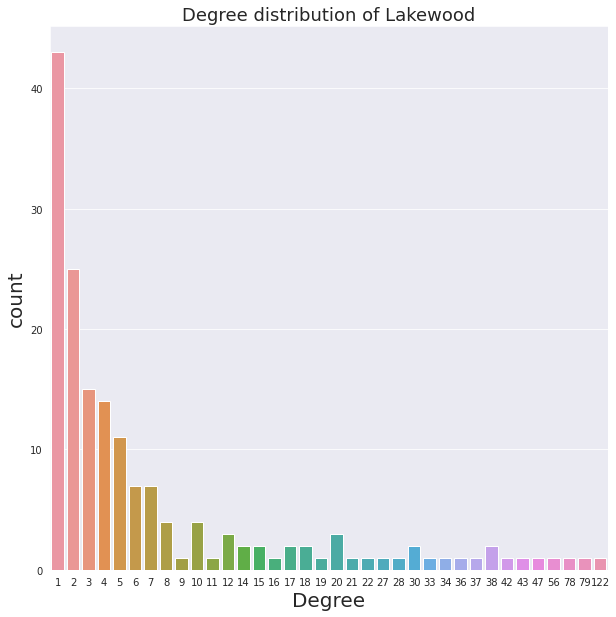

In [16]:
plot_degree_dist(graph_network_lakewood, "Degree distribution of Lakewood")

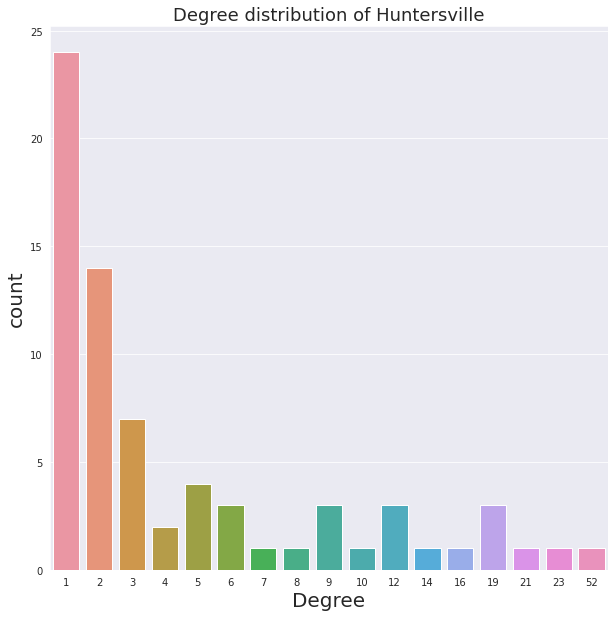

In [17]:
plot_degree_dist(graph_network_huntersville, "Degree distribution of Huntersville")

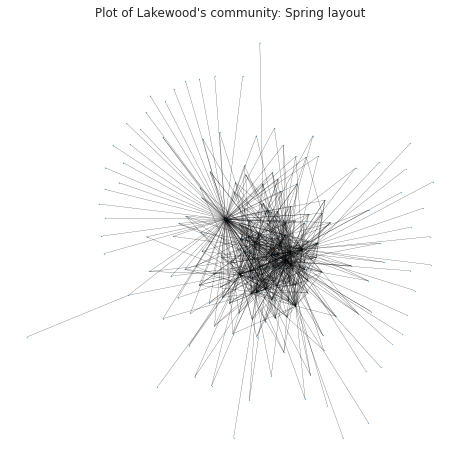

In [18]:
pos_sl_lw =  nx.spring_layout(graph_network_lakewood)
plt.figure(figsize=(8,8))
plt.title("Plot of Lakewood's community: Spring layout")
nx.draw(graph_network_lakewood, pos=pos_sl_lw, node_size=0.05, width=0.2)

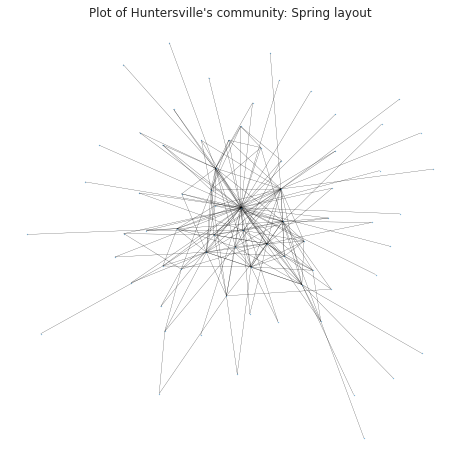

In [19]:
pos_sl_hv =  nx.spring_layout(graph_network_huntersville)
plt.figure(figsize=(8,8))
plt.title("Plot of Huntersville's community: Spring layout")
nx.draw(graph_network_huntersville, pos=pos_sl_hv, node_size=0.05, width=0.2)

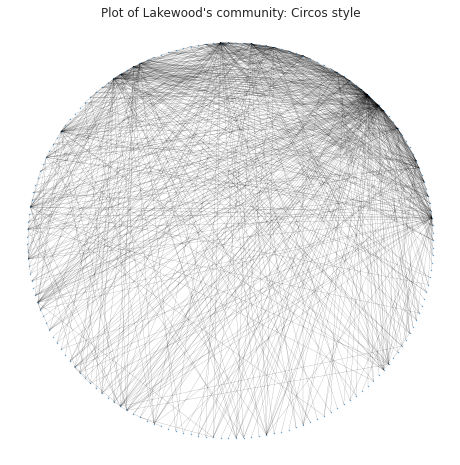

In [20]:
plt.figure(figsize=(8,8))
plt.title("Plot of Lakewood's community: Circos style")
nx.draw_circular(graph_network_lakewood,node_size=0.1, width=0.1)

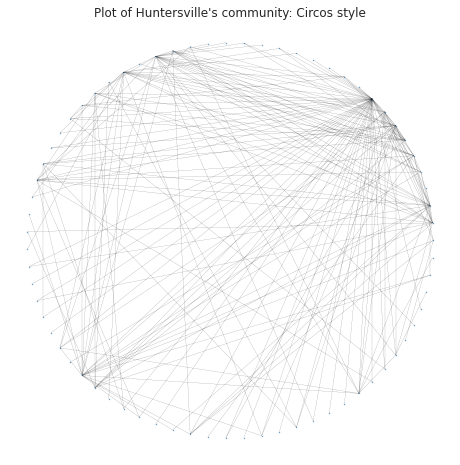

In [21]:
plt.figure(figsize=(8,8))
plt.title("Plot of Huntersville's community: Circos style")
nx.draw_circular(graph_network_huntersville,node_size=0.1, width=0.1)

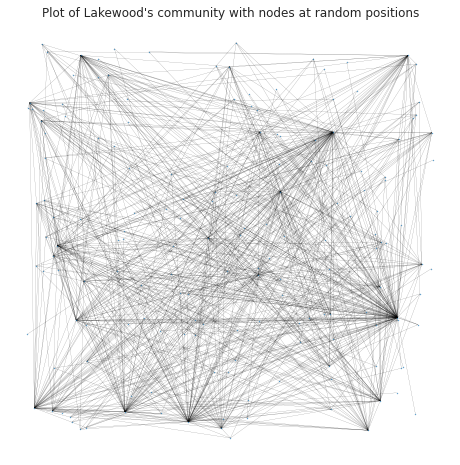

In [22]:
plt.figure(figsize=(8,8))
plt.title("Plot of Lakewood's community with nodes at random positions")
nx.draw_random(graph_network_lakewood,node_size=0.1, width=0.1)

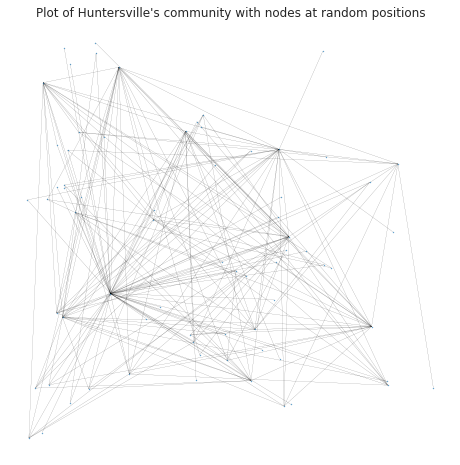

In [23]:
plt.figure(figsize=(8,8))
plt.title("Plot of Huntersville's community with nodes at random positions")
nx.draw_random(graph_network_huntersville,node_size=0.1, width=0.1)

In [24]:
#https://towardsdatascience.com/an-introduction-to-graph-partitioning-algorithms-and-community-detection-29e7c962d10e

In [25]:
def plot_eigenvalues(G,title='',save=False,file_name=''):
    fig, ax = plt.subplots(figsize=(10,10))
    lap_mat = nx.linalg.normalized_laplacian_matrix(G)
    eigenvalues, eigenvectors = np.linalg.eig(lap_mat.toarray())
    sortedEigenvalues = sorted(eigenvalues)[:10]
    plt.xlabel('k', fontdict={'fontsize':20})
    plt.ylabel('Eigenvalue', fontdict={'fontsize':20})
    plt.title(title,fontdict={'fontsize':18})
    plt.plot(sortedEigenvalues,marker='o')

In [26]:
def get_number_communities(G):
    lap_mat = nx.linalg.normalized_laplacian_matrix(G)
    eigenvalues, eigenvectors = np.linalg.eig(lap_mat.toarray())
    sortedEigenvalues = sorted(eigenvalues)[:10]
    return np.argmax(np.diff(sortedEigenvalues))+1

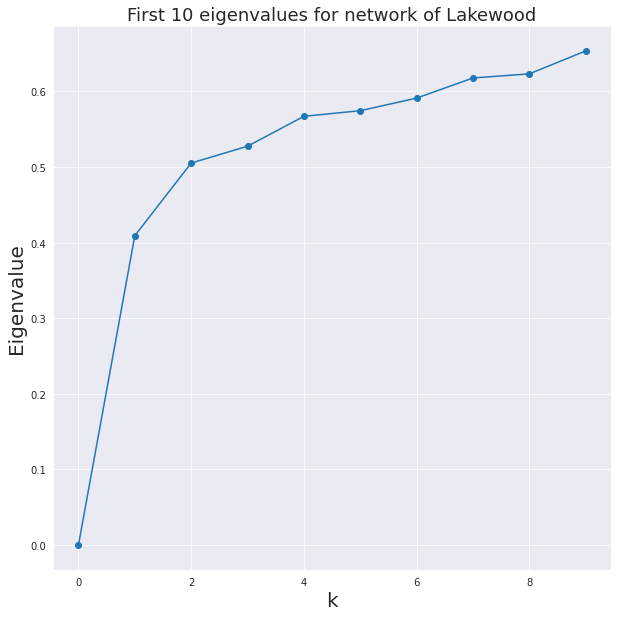

In [27]:
plot_eigenvalues(graph_network_lakewood, title = 'First 10 eigenvalues for network of Lakewood')

In [28]:
communities_lakewood = get_number_communities(graph_network_lakewood)
communities_lakewood

1

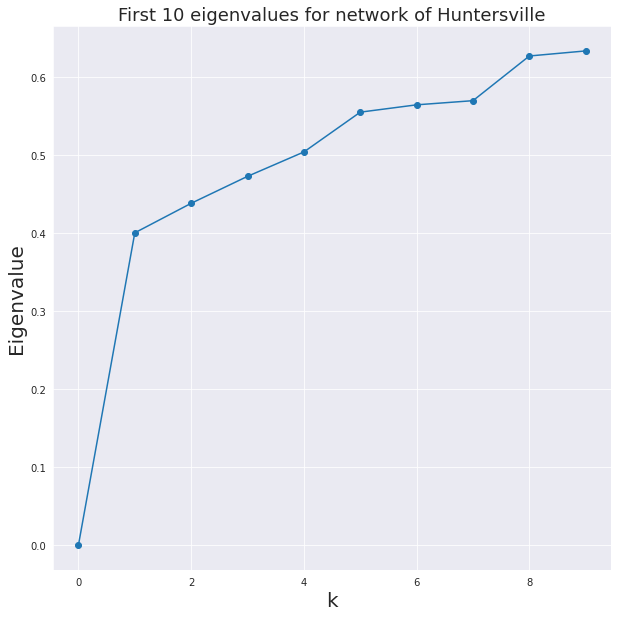

In [29]:
plot_eigenvalues(graph_network_huntersville, title = 'First 10 eigenvalues for network of Huntersville')

In [30]:
communities_huntersville = get_number_communities(graph_network_huntersville)
communities_huntersville

1

In [31]:
partitions_lakewood = community.best_partition(graph_network_lakewood)
values_lakewood = [partitions_lakewood.get(node) for node in graph_network_lakewood.nodes()]

In [32]:
print(len(set(values_lakewood)))

6


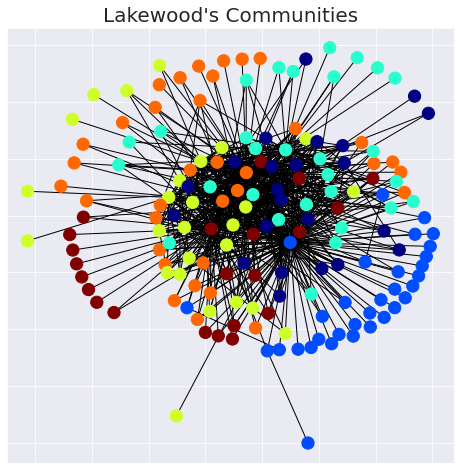

In [33]:
plt.figure(figsize=(8,8))
plt.axes=False
plt.title("Lakewood's Communities",fontsize=20)
nx.draw_networkx(graph_network_lakewood, pos = nx.kamada_kawai_layout(graph_network_lakewood),
                 cmap = plt.get_cmap("jet"), node_color = values_lakewood, node_size = 150, with_labels = False)

In [34]:
partitions_huntersville = community.best_partition(graph_network_huntersville)
values_huntersville = [partitions_huntersville.get(node) for node in graph_network_huntersville.nodes()]

In [35]:
print(len(set(values_huntersville)))

5


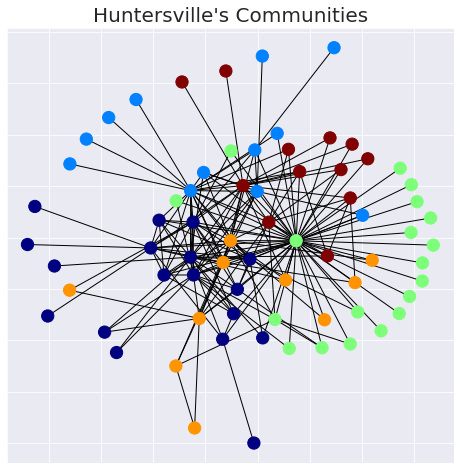

In [36]:
plt.figure(figsize=(8,8))
plt.axes=False
plt.title("Huntersville's Communities",fontsize=20)
nx.draw_networkx(graph_network_huntersville, pos = nx.kamada_kawai_layout(graph_network_huntersville),
                 cmap = plt.get_cmap("jet"), node_color = values_huntersville, node_size = 150, with_labels = False)